In [4]:
import numpy as np

Ngen=10000


Er = 10
Eer = Er*np.ones((Ngen,100))
V=4
eps=3.3

import resfuncRead as rfr

#read the files
ptres = rfr.getRFunc('data/jardin_ptres.txt')
qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

#make the resolution functions
fpt = rfr.makeRFunc(ptres[1]['sqrt'])
fq = rfr.makeRFunc(qres[1]['lin'],True)
fptv = np.vectorize(fpt)
fqv = np.vectorize(fq)



Pter = Eer + (V/eps)*Eer
print(fptv(Pter[0,0]))
Pter = Pter + np.random.normal(0.0,fptv(Pter))
Qer = Eer
print(fqv(Qer[0,0]))
Qer = Qer + np.random.normal(0.0,fqv(Qer))

Erer = Pter - (V/eps)*Qer
#Ernr = Enr
Yer = Qer/Erer

#***********change over to Y******************
amean=1
sigx = 0.05
amax = 0.1
print(fptv((1+(V/eps))*Er))
print(fqv(Er))
#siga_both = (1/Er)*np.sqrt((1+(V/eps)*Y)**2*fqv(Y*Er)**2 + (1+(V/eps))**2*Y**2*fptv((1+(V/eps)*Y)*Er)**2)
siga_both = (1/Er)*np.sqrt((1+(V/eps))**2*fqv(Er)**2 + fptv((1+(V/eps))*Er)**2)
#print((1/Er)*np.sqrt((1+(V/eps)*Y)**2*fqv(Y*Er)**2))
#print((1/Er)*np.sqrt(Y**2*fptv((1+(V/eps)*Y)*Er)**2))
siga_q = (1/Er)*np.sqrt(fqv(Er)**2)
siga = siga_both
print(siga_both)
print(siga_q)
print(siga)
A = Yer + np.random.normal(0,sigx,np.shape(Yer))
#***********use A*****************************
#amean=0
#sigx = 10.1
#amax = 30
#siga = 5
#A = np.random.normal(0,np.sqrt(siga**2),(Ngen,100))
#A = A + np.random.normal(0,np.sqrt(sigx**2),(Ngen,100))
#************do it the other way***************************
#amean=0
#sigx = 10.1
#amax = 30
#siga = 5
#A = np.random.normal(0,np.sqrt(siga**2_sigx**2),(Ngen,100))
#*********************************************************


print(np.shape(A))
print(np.shape(Yer))
print(Yer[0:5,0])
print(A[0:5,0])


0.6349358597668551
0.4962379
0.634935859766855
0.4962379
0.12681376532489033
0.04962379
0.12681376532489033
(10000, 100)
(10000, 100)
[0.92205025 1.12389147 1.02590621 1.25259613 1.15009827]
[0.98333899 1.15276861 1.07176666 1.24521053 1.12909725]


In [5]:
#define a Gaussian 
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
#do a fit
from scipy.optimize import curve_fit


val = []
val_stat = []
err = []
for i in np.arange(0,np.shape(A)[1]):
    v = A[:,i]
    nv,nvx = np.histogram(v,100,range=(amean-amax-sigx-0.2,amean+amax+sigx+0.2))
    xvc = (nvx[:-1] + nvx[1:]) / 2
    pars,parerr = curve_fit(gaus,xvc,nv,p0=[1000, amean, (amax/3)])
    val_stat.append(np.sqrt(np.std(v)**2-siga**2))
    val.append(np.sqrt(pars[2]**2-siga**2))
    err.append(np.sqrt(pars[2]**2/(pars[2]**2-siga**2)*parerr[2,2]))
    #err.append(np.sqrt(parerr[2,2]))
    
n,nx = np.histogram(A[:,0],100,range=(amean-amax-sigx-0.2,amean+amax+sigx+0.2))

xc = (nx[:-1] + nx[1:]) / 2

print(np.shape(n))
print(np.shape(xc))
print(amean)
print(amax)

(100,)
(100,)
1
0.1


In [7]:


popt,pcov = curve_fit(gaus,xc,n,p0=[1000, amean, (amax/3)])

print(popt)
print(pcov)

[2.06141690e+02 9.95919417e-01 1.33876751e-01]
[[ 7.34590334e+00  3.35872117e-06 -3.22759680e-03]
 [ 3.35872117e-06  4.12050312e-06 -5.17711872e-09]
 [-3.22759680e-03 -5.17711872e-09  4.20577260e-06]]


In [8]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

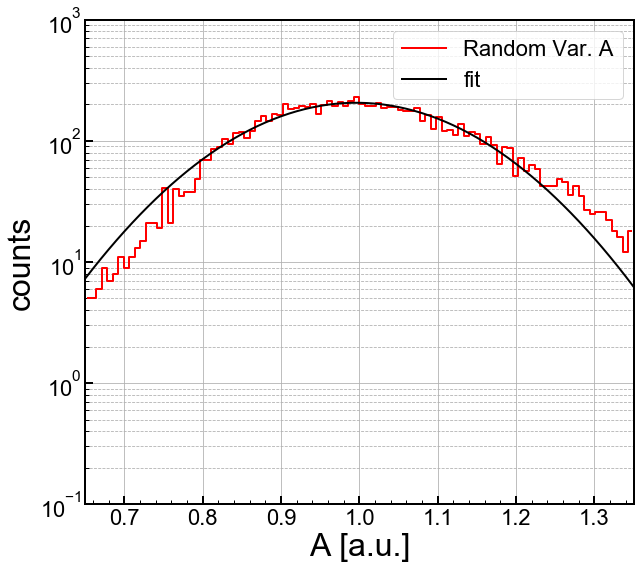

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(amean-amax-sigx-0.2,amean+amax+sigx+0.2,0.01)

step, = ax1.step(xc,n, where='mid',color='r', linestyle='-', label='Random Var. A', linewidth=2)
ax1.plot(X,gaus(X,*popt),'k-',label='fit')


ymin=0.1
ymax=1000


ax1.set_yscale('log')
ax1.set_xlim(amean-amax-sigx-0.2, amean+amax+sigx+0.2)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/simple_extract_ydist_ER.png')
plt.show()

In [10]:
sig_extract = np.sqrt(popt[2]**2-siga**2)

err_extract = np.sqrt(1/(4*(sig_extract**2-siga**2))*pcov[2,2])

print('{0:3.2f} +/- {1:3.2f}'.format(sig_extract,err_extract))

0.04 +/- nan


/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


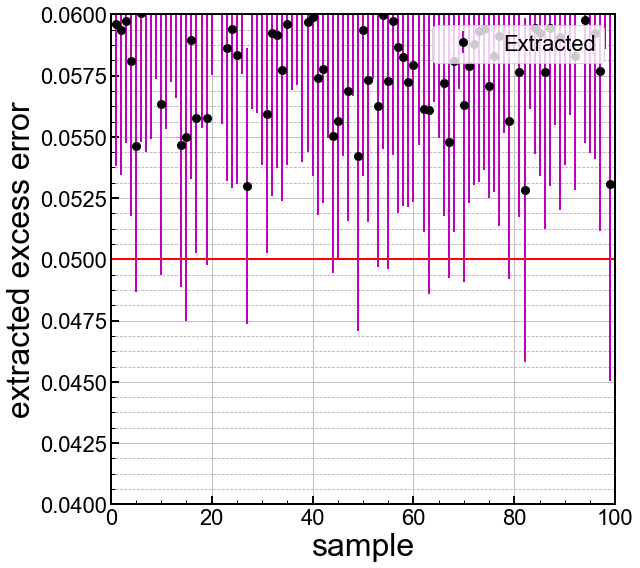

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

val_stat = np.asarray(val_stat)
val = np.asarray(val)
err = np.asarray(err)
xerr=np.zeros(np.shape(err))

ax1.errorbar(np.arange(0,np.shape(val_stat)[0]),val_stat,yerr=[err,err], marker='o', markersize=8, \
             ecolor='m',color='k', linestyle='none', label='Extracted', linewidth=2)


ax1.axhline(sigx,linestyle='-',color='r')

ymin=sigx-0.1*amax
ymax=sigx+0.1*amax


ax1.set_yscale('linear')
ax1.set_xlim(0, np.shape(val)[0]) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('sample',**axis_font)
ax1.set_ylabel('extracted excess error',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/simple_extract_values_ER.png')
plt.show()

In [12]:
print('{0:3.3f} +/- {1:3.3f}'.format(np.mean(val),(1/np.float(np.shape(err)[0]))*np.sqrt(np.sum(err**2))))

0.045 +/- 0.001


0.0026162136445527103


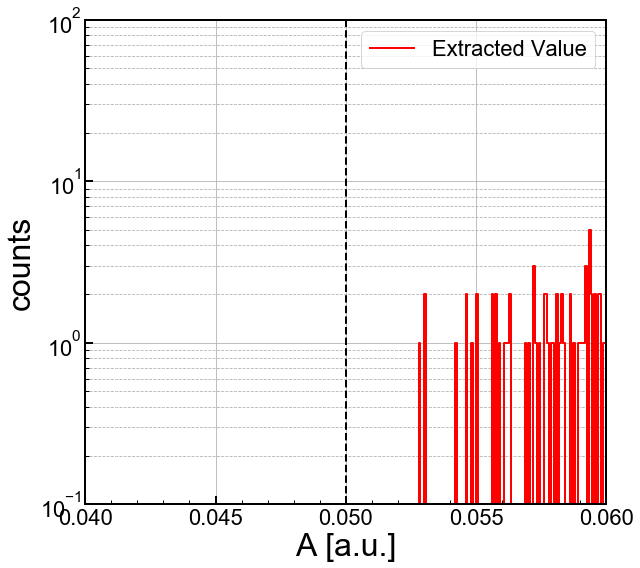

In [13]:
xmin=sigx-0.1*amax
xmax=sigx+0.1*amax

print(np.std(val_stat))

n_res,n_resx = np.histogram(val_stat,300,range=(xmin,xmax))


xresc = (n_resx[:-1] + n_resx[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(sigx-amax,sigx+amax,0.01)

step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label='Extracted Value', linewidth=2)
ax1.axvline(sigx,linestyle='--',color='k')


ymin=0.1
ymax=100


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/simple_extract_hist_ER.png')
plt.show()